In [1]:
import datetime 

In [24]:
arival_date = datetime.date(day=24, month=6, year=2024)
departure_date = datetime.date(day=30, month=8, year=2024)
total_days = (departure_date - arival_date).days 
arival_date, departure_date, total_days

(datetime.date(2024, 6, 24), datetime.date(2024, 8, 30), 67)

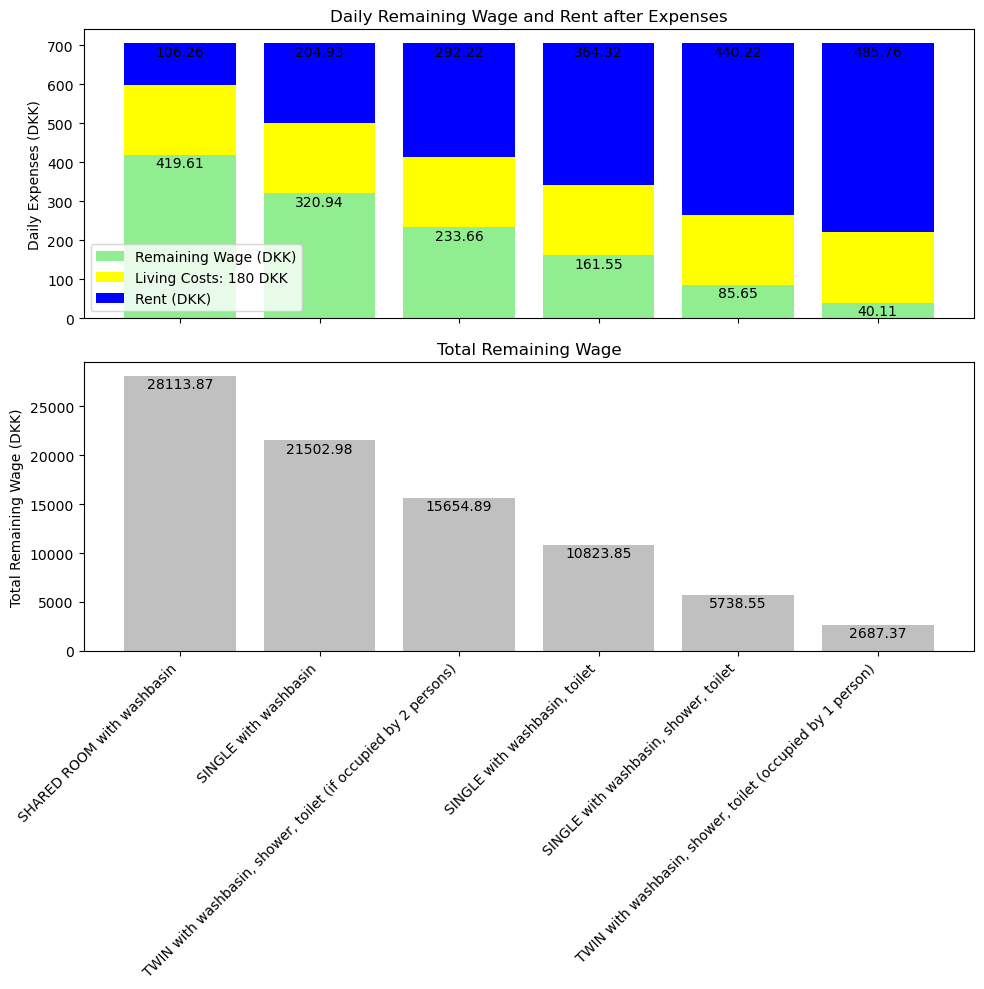

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Prices in CHF
prices_chf = {
     "SHARED ROOM with washbasin": 14,
    "SINGLE with washbasin": 27,
     "TWIN with washbasin, shower, toilet (if occupied by 2 persons)": 38.50,
    "SINGLE with washbasin, toilet": 48,
    "SINGLE with washbasin, shower, toilet": 58,
     "TWIN with washbasin, shower, toilet (occupied by 1 person)": 64
}

# Conversion rate from CHF to DKK (1 CHF = 7.5 DKK)
conversion_rate = 7.59

# Available wage in CHF
wage_chf = 93

# Convert prices to DKK
prices_dkk = {room_type: price * conversion_rate for room_type, price in prices_chf.items()}

# Calculate remaining wage after expenses for each option
remaining_wages_dkk = {room_type: wage_chf * conversion_rate - price_dkk 
                       for room_type, price_dkk in prices_dkk.items()}

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Plot bars for remaining wages after expenses

living_costs = 180 # 150
remaining_wages_dkk_extra = [wave - living_costs for wave in remaining_wages_dkk.values()]
bars1 = ax1.bar(remaining_wages_dkk.keys(), remaining_wages_dkk_extra,
                color='lightgreen', label='Remaining Wage (DKK)')

living_list = [living_costs for i in prices_dkk.values()]
bars3 = ax1.bar(prices_dkk.keys(), living_list,
                bottom=remaining_wages_dkk_extra, color='yellow', label=f'Living Costs: {living_costs} DKK')

# Plot bars for rent
bars2 = ax1.bar(prices_dkk.keys(), prices_dkk.values(),
                bottom=list(remaining_wages_dkk.values()), color='blue', label='Rent (DKK)')

# Annotate rent value over each histogram bin
for bar, bar2val in zip(bars1, bars2):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height - 40, f'{height:.2f}', ha='center', 
             va='bottom', color='black')
    ax1.text(bar2val.get_x() + bar2val.get_width() / 2, height - 40 + bar2val.get_height() + living_costs, 
             f'{bar2val.get_height():.2f}', ha='center', va='bottom', color='black')


# Plot horizontal line for available wage after expenses
ax1.set_title('Daily Remaining Wage and Rent after Expenses')
ax1.set_ylabel('Daily Expenses (DKK)')
ax1.legend(loc="lower left")

total_values = [wave * total_days for wave in remaining_wages_dkk_extra]
    
bars3 = ax2.bar(remaining_wages_dkk.keys(), total_values, color='silver')
ax2.set_title('Total Remaining Wage')
ax2.set_ylabel('Total Remaining Wage (DKK)')
    
# Manually adjust tick labels position
ax2.set_xticks(range(len(remaining_wages_dkk)))
ax2.set_xticklabels(remaining_wages_dkk.keys(), rotation=45, ha='right')

# Annotate value over each histogram bin
for bar in bars3:
    height = bar.get_height()
    ax2.annotate('{}'.format(round(height, 2)),
                 xy=(bar.get_x() + bar.get_width() / 2, height - 2000),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()
